# Long short-term Memory (LSTM) Network

LSTM (Long Short-Term Memory) network is a type of Recurrent Neural Networks (RNN), which is a powerful tool for time series prediction problems as well as natural language processing and machine translation and is designed to handle sequence dependencies.

The learning goals of this tutorial are to introduce you to LSTM networks in a simple stock price prediction model.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imporintg required libraries
import tensorflow as tf

# Comment this lines in your computers or Google COLAB
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the training set
dataset_train = pd.read_csv('../Data/Tutorial-RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
print(training_set.shape)
print(training_set[0:5])

(1258, 1)
[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [4]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
print(training_set_scaled.shape)
print(training_set_scaled[0:5])

(1258, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i , 0])
  Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
print(X_train.shape, Y_train.shape)
print(Y_train[0])
print(X_train[0:2])
#print(training_set_scaled[0:61])

(1198, 60, 1) (1198,)
0.08627874097775134
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]
  [0.05214302]
  [0.05612397]
  [0.05818885]
  [0.06540665]
  [0.06882953]
  [0.07243843]
  [0.07993526]
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.079842

In [8]:
# Initializing the LSTM
model = Sequential()

In [9]:
# Adding the first LSTM and Droupout regularization
model.add(LSTM(units= 50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding the second LSTM and Droupout regularization
model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(0.2))

# Adding the third LSTM and Droupout regularization
model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(0.2))

# Adding the fourth LSTM and Droupout regularization
model.add(LSTM(units= 50))
model.add(Dropout(0.2))

# Adding output layer
model.add(Dense(units= 1))

In [10]:
# Compiling
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [11]:
# Fitting the data
model.fit(X_train, Y_train, epochs= 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0535
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0067
Epoch 5/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [12]:
# Loading the test dataset
dataset_test = pd.read_csv('../Data/Tutorial-RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
# Doig the prediction on test set for 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

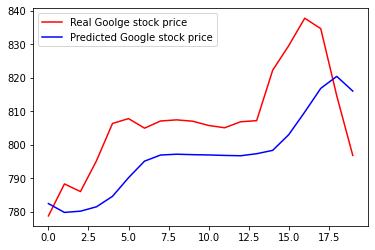

In [14]:
# Visualize the resulats
plt.plot(real_stock_price, color= 'red', label= 'Real Goolge stock price')
plt.plot(predicted_stock_price, color= 'blue', label= 'Predicted Google stock price')
plt.legend()
plt.show()

## References
https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

https://www.kaggle.com/akram24/google-stock-price-train


https://www.kaggle.com/akram24/google-stock-price-test/version/1